# [`PyTorch` Tutorial] Introduction to Deep Learning

<img width = '1000' height = '600' src = 'https://github.com/SHlee-TDA/Machine-Learning/blob/main/1.png?raw=true'>

# 1. Artificial Neural Networks (ANN)

## 1.1 Motivation

<img width = '1000' height = '600' src = 'https://github.com/SHlee-TDA/Machine-Learning/blob/main/2.png?raw=true'>

Let's begin with simplest examples.

Consider two binary classification problems.

It is very typical situation in machine learning. 

One might say that what we should do to solve this problem is to *__find an appropriate decision boundary function__*.

In the left figure, *linear* decision boundary functions can split a plane into two regions for each class.




<img width = '600' height = '400' src = 'https://github.com/SHlee-TDA/Machine-Learning/blob/main/3.png?raw=true'>
<img width = '600' height = '400' src = 'https://github.com/SHlee-TDA/Machine-Learning/blob/main/4.png?raw=true'>

However, in the right figure, two classes are __never__ split by linear function.

Hence, we need to find *__non-linear__* decision boundary function.



<img width = '1000' height = '600' src = 'https://github.com/SHlee-TDA/Machine-Learning/blob/main/5.png?raw=true'>



**Multi-Layer Perceptron(MLP)** we will study now is one way to generate a *__non-linear decision boundary function__*.

And network structures based on MLP is called *__Artificial Neural Network__*.






## 1.2 Perceptron

<img width = '1000' height = '600' src = 'https://github.com/SHlee-TDA/Machine-Learning/blob/main/6.png?raw=true'>

Neural Networks consists of neurons as basic units

Neuron receives input signals and sends this signal to the next neuron when the signal are over a certain threshold.

(Artificial) Perceptron is the algorithmic implement to neuron cell.

It receives input signals as a vector or a tensor and transforms them linearly.

And after filtering the signal according to certain threshold, it sends the signals to the next perceptron.



## 1.3 Activation function


<img width = '1000' height = '600' src = 'https://github.com/SHlee-TDA/Machine-Learning/blob/main/7.png?raw=true'>

It is the *__activation function__* that plays the role of this threshold criteria.

There are several activation functions: __Step function__, __Sigmoid function__, __ReLU(Rectified Linear Unit)__.

The single pipeline from linear transform to activation function is called *Single-Layer Perceptron(SLP)*.

It is well known that the single-layer perceptron works well for linear classification problem.


Refer to [*Perceptron Convergence Theorem*](https://en.wikipedia.org/wiki/Perceptron#Convergence).

## Implementation : Single-Layer Perceptron

In [23]:
## import pytorch tools

import torch
import torch.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.datasets as dsets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import random

In [24]:
## Pytorch uses 'tensor' type data as its unit.
## Refer to the following link if you want to know why tensor is better than list or numpy:
## https://hiddenbeginner.github.io/deeplearning/2020/01/21/pytorch_tensor.html

data = [1.0, 2.0, 3.0]
X = torch.Tensor(data)
type(X)

torch.Tensor

In [25]:
## Pytorch 'Linear' layer works a linear transform just like the name.

linear = nn.Linear(in_features = 3, out_features = 3)   # nn.Linear(3,3) makes randomly chosen 3x3 matrix.
linear(X)

tensor([-0.9055, -0.6772,  0.6023], grad_fn=<AddBackward0>)

In [26]:
## Activation function works 'thresholding' to processed signal.

step = nn.ReLU()    # 'Rectified Linear Unit(ReLU(x) = max(0,x)) is a famous activation function.
step(linear(X))

tensor([0.0000, 0.0000, 0.6023], grad_fn=<ReluBackward0>)

In [27]:
## nn.Sequential binds materials for your perceptron layer. 

Perceptron = nn.Sequential(linear, step)    # Our single perceptron layer.
Perceptron(X)

tensor([0.0000, 0.0000, 0.6023], grad_fn=<ReluBackward0>)

## 1.4 Multi-Layer Perceptron (MLP)

<img width = '1000' height = '600' src = 'https://github.com/SHlee-TDA/Machine-Learning/blob/main/8.png?raw=true'>

*__Multi-Layer Perceptron(MLP)__* is nothing but a sequence of several perceptron.

But, literally, "Simple is really Best!"

Stacking linear transforms and activation functions makes non-linearity.

And this can generate very powerful non-linear decision boundary function after training. 

Refer to [*Universal Approximation Theorem*](https://en.wikipedia.org/wiki/Universal_approximation_theorem)






## Implementation : MNIST and MLP

MNIST data is 'Hello world!' example in Machine Learning field.

MNIST consists of total 60,000 hand-written digits images for training data with labels and 10,000 images for test data.

Now let's make a digits classifier based on MLP.

In [28]:
# MNIST dataset
# Download MNIST data sets and load them as Tensor form.

mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

This image is  5


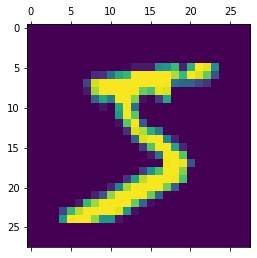

In [30]:
## Choose a sample image.

sample_img, sample_label = mnist_train[0]
plt.matshow(sample_img[0])
print('This image is ', sample_label)


In [31]:
## Image data is of the form 28*28.
## We need to flatten this image to put in linear layer.

flat = nn.Flatten()
flat(sample_img).shape

torch.Size([1, 784])

In [17]:
## Simple two-layer perceptron network.

class ANN(nn.Module):                   ## 
    def __init__(self):
        super(ANN, self).__init__()

        self.flatten = nn.Flatten()

        self.layer1 = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU()
        )

        self.layer2 = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU()
        )

        self.out = nn.Sequential(
            nn.Linear(512, 10)
        )

    # 'forward' sets the data in the direction of progress.
    # This will use for calculating gradient later.
    def forward(self, x):
        x = self.flatten(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.out(x)
        return x

In [35]:
## Define our model.

model = ANN()
print(model)

ANN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=512, out_features=512, bias=True)
    (1): ReLU()
  )
  (out): Sequential(
    (0): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [36]:
## Put in the sample image to our model.

model(sample_img)

tensor([[-0.0111,  0.0352,  0.0130, -0.0305,  0.0312, -0.0153, -0.0136,  0.0370,
         -0.0052, -0.0448]], grad_fn=<AddmmBackward0>)

In [21]:
## The argmax value of model output is the prediction of model for our sample image.
## Maybe your prediction is not correct. 
## In fact, there is no reason for model to predict correctly.

model(sample_img).argmax()

tensor(3)

## 1.5 Gradient Descent



<img width = '1000' height = '600' src = 'https://github.com/SHlee-TDA/Machine-Learning/blob/main/9.png?raw=true'>

After we get a prediction $\tilde{y}$, the prediction error is obtained by calculating the *loss function* between the prediction $\tilde{y}$ and the label $y$.

Gradient descent is an algorithm in order to update the weights $W$ and reduce the loss function value.

In doing so, neural network models are trained and then generate more improved decision function.

For more details about gradient descent and several optimization algorithms, see the following [link](https://hiddenbeginner.github.io/deeplearning/2019/09/22/optimization_algorithms_in_deep_learning.html).





## Implementation : Training

In [37]:
# set the training parameters
lr = 0.001              # learning rate
training_epochs = 15    # epoch numbers
batch_size = 512        # batch size

In [39]:
# Data loader sets the overall training process of the model.  

data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [38]:
# Choose loss function (criterion) and optimization algorithm (optimizer).

criterion = nn.CrossEntropyLoss()    
optimizer = optim.AdamW(model.parameters(), lr=lr)

In [41]:
## Training Algorithm

total_batch = len(data_loader)

for epoch in range(training_epochs):    # Training is performed as much as epoch.
    avg_cost = 0

    for X, Y in data_loader:            # X is input image, Y is label of the image

        optimizer.zero_grad()           # Initialize optimizer to zero.
        prediction = model(X)           # Calculate prediction.
        
        cost = criterion(prediction, Y) # Cost is calculated 
        cost.backward()                 # Calculate gradients by back-propagation.
        optimizer.step()                # Do optimization step

        avg_cost += cost / total_batch  # Record the value of cost.

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
print('Learning finished')

Epoch: 0001 cost = 0.453651726
Epoch: 0002 cost = 0.163055867
Epoch: 0003 cost = 0.107910745
Epoch: 0004 cost = 0.075972177
Epoch: 0005 cost = 0.055778354
Epoch: 0006 cost = 0.044476148
Epoch: 0007 cost = 0.034060862
Epoch: 0008 cost = 0.026254028
Epoch: 0009 cost = 0.020116607
Epoch: 0010 cost = 0.015809579
Epoch: 0011 cost = 0.012971240
Epoch: 0012 cost = 0.009805708
Epoch: 0013 cost = 0.008101291
Epoch: 0014 cost = 0.006497889
Epoch: 0015 cost = 0.005705670
Learning finished


In [42]:
## Test our model works well. 

Y = model(sample_img)
pred = Y.argmax()
print(pred)


tensor(5)


## Test

In [44]:
# Test the model using test sets

with torch.no_grad(): # In order to test your model, YOU NEED TO SET `with torch.no_grad()`!!
    X_test = mnist_test.data.float()
    Y_test = mnist_test.targets

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())


Accuracy: 0.9800999760627747


## 1.6 Artificial Neural Network (ANN)

Are you satisfied with the accuracy?

This framework is called Artificial Neural Network (ANN).


<img width = '1000' height = '600' src = 'https://github.com/SHlee-TDA/Machine-Learning/blob/main/10.png?raw=true'>

# 2.Convolutional Neural Network (CNN)

## 2.1 Motivation

ANN was good. 

However, note that ANN need to flatten image to input your data.

Thus *the shape of data* might forget.

CNN is one of method to consider the shape of data.


<img width = '1000' height = '600' src ='https://github.com/SHlee-TDA/Machine-Learning/blob/main/11.png?raw=true'>

## 2.2 Convolution 

<img width = '1000' height = '600' src = 'https://github.com/SHlee-TDA/Machine-Learning/blob/main/12.png?raw=true'>

Convolution layer works by sliding a window $W$, say kernel or filter, and multiplying pixel values and filter values point-wisely.

Then we get locally summarized information for the shape of data.

Following equation tells us the output size.

<img width = '1000' height = '600' src = 'https://github.com/SHlee-TDA/Machine-Learning/blob/main/13.png?raw=true'>
<img width = '1000' height = '600' src = 'https://github.com/SHlee-TDA/Machine-Learning/blob/main/14.png?raw=true'>

- $C_{in}$ : input channel. Our MNIST image has only one channel, but in general image has RGB 3-channels.
- $H_{in}, W_{in}$ : input height and input width.
- $C_{out}$ : output channel. We can choose this parameter and it determines how many number of features are generated by our convolution layer.
- $padding$ : literally, pad some numbers (in general 0) on input image to control the output size.
- $stride$ : a unit of each sliding window step.


## Implementation : Convolution layer

In [46]:
## One can make a convolution layer simply.

conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
conv1(sample_img[None, :, :, :])

[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


tensor([[[[-0.2667, -0.2667, -0.2667,  ..., -0.2667, -0.2667, -0.2667],
          [-0.2667, -0.2667, -0.2667,  ..., -0.2667, -0.2667, -0.2667],
          [-0.2667, -0.2667, -0.2667,  ..., -0.2667, -0.2667, -0.2667],
          ...,
          [-0.2667, -0.2667, -0.2667,  ..., -0.2667, -0.2667, -0.2667],
          [-0.2667, -0.2667, -0.2667,  ..., -0.2667, -0.2667, -0.2667],
          [-0.2667, -0.2667, -0.2667,  ..., -0.2667, -0.2667, -0.2667]],

         [[-0.2272, -0.2272, -0.2272,  ..., -0.2272, -0.2272, -0.2272],
          [-0.2272, -0.2272, -0.2272,  ..., -0.2272, -0.2272, -0.2272],
          [-0.2272, -0.2272, -0.2272,  ..., -0.2272, -0.2272, -0.2272],
          ...,
          [-0.2272, -0.2272, -0.2272,  ..., -0.2272, -0.2272, -0.2272],
          [-0.2272, -0.2272, -0.2272,  ..., -0.2272, -0.2272, -0.2272],
          [-0.2272, -0.2272, -0.2272,  ..., -0.2272, -0.2272, -0.2272]],

         [[-0.0974, -0.0974, -0.0974,  ..., -0.0974, -0.0974, -0.0974],
          [-0.0974, -0.0974, -

In [48]:
## Knowing the output size of convolution layer is important.

conv1(sample_img[None, :, :, :]).shape

torch.Size([1, 32, 28, 28])

In [49]:
## In general, ReLU layer is placed after convolution layer.

relu = nn.ReLU()
layer = nn.Sequential(conv1, relu)

layer(sample_img[None, :, :, :])

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [52]:
## Finally, Maxpooling layer is placed after.
## Maxpooling layer works sub-sampling to reduce the output size and then to leave important features.

pool = nn.MaxPool2d(kernel_size=2, stride = 2)
layer = nn.Sequential(conv1, relu, pool)

# This is a typical convolution layer structure.
# Note that the output size of convolution layer.
layer(sample_img[None, :,:,:]).shape



torch.Size([1, 32, 14, 14])

## 2.3 Network Structure

<img width = '1000' height = '600' src = 'https://github.com/SHlee-TDA/Machine-Learning/blob/main/15.png?raw=true'>


Typical CNN structure consists of several convolution layers in front and fully connected layers (MLPs) at the end.

CNN structure can make more powerful performance, because it uses the locally geometric shape of data.

## Implementation : CNN

In [54]:
# CNN Model (2 conv layers)
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        
        # L1 ImgIn shape=(?, 1, 28, 28)
        #    Conv     -> (?, 32, 28, 28)
        #    Pool     -> (?, 32, 14, 14)
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        

        # L2 ImgIn shape=(?, 32, 14, 14
        #    Conv      ->(?, 64, 14, 14)
        #    Pool      ->(?, 64, 7, 7)
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        # Final FC 7x7x64 inputs -> 10 outputs

        
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.size(0), -1)   # Flatten them for FC
        x = self.fc(x)
        return x

In [55]:
model = CNN()
model(sample_img[None,:,:,:])


tensor([[-0.0257,  0.0603, -0.0232,  0.0068,  0.0359,  0.0069,  0.0655,  0.0449,
          0.0431, -0.0574]], grad_fn=<AddmmBackward0>)

In [56]:
model(sample_img[None, :, :,:]).argmax()

tensor(6)

In [57]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss()  # Softmax is internally computed.
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

In [58]:
# train my model
total_batch = len(data_loader)
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        
        optimizer.zero_grad()
        hypothesis = model(X)
        
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
[Epoch:    1] cost = 0.558016539
[Epoch:    2] cost = 0.125402912
[Epoch:    3] cost = 0.0824157596
[Epoch:    4] cost = 0.0646317825
[Epoch:    5] cost = 0.0545987934
[Epoch:    6] cost = 0.0472714379
[Epoch:    7] cost = 0.0421830155
[Epoch:    8] cost = 0.0372184142
[Epoch:    9] cost = 0.0340796709
[Epoch:   10] cost = 0.030795373
[Epoch:   11] cost = 0.0307574291
[Epoch:   12] cost = 0.0269902181
[Epoch:   13] cost = 0.0242694262
[Epoch:   14] cost = 0.022371849
[Epoch:   15] cost = 0.0210635904
Learning Finished!


In [94]:
model(sample_img[None, :, :, :]).argmax()

tensor(5)

In [91]:
# Test model and check accuracy
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float()
    Y_test = mnist_test.test_labels

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

/Users/leeseongheon/opt/anaconda3/envs/TDAwithCNN/lib/python3.8/site-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.984000027179718


# Thank you!

Writer : Seong heon, Lee (POSTECH MINDS)
Contact : shlee0125@postech.ac.kr
Github : https://github.com/SHlee-TDA
MINDS Github : https://github.com/postech-minds/postech-minds

# References 

1. Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow - Aurelien, Geron
2. 모두를 위한 딥러닝 시즌 2 -파이토치- [Deeplearningzerotoall](https://deeplearningzerotoall.github.io/season2/)
3. HiddenBeginner(이동진) blog posts (https://hiddenbeginner.github.io/)